In [2]:
import hypernetx as hnx
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import pandas as pd
import warnings 
warnings.simplefilter('ignore')

from collections import defaultdict
from hypernetx.drawing import draw_incidence
from hypernetx.drawing import draw_bipartite

from importlib import reload; reload(draw_incidence); reload(draw_bipartite)

<module 'hypernetx.drawing.draw_bipartite' from '/Users/yunj738/projects/hypernetx/hypernetx/drawing/draw_bipartite.py'>

# Data

The data in several of our notebooks are taken from the jean.dat dataset available from the Stanford GraphBase at https://www-cs-faculty.stanford.edu/~knuth/sgb.html. This data gives character scene incidence information from the novel Les Miserables by Victor Hugo.

In [3]:
scenes = {
    0: ('FN', 'TH'),
    1: ('TH', 'JV'),
    2: ('BM', 'FN', 'JA'),
    3: ('JV', 'JU', 'CH', 'BM'),
    4: ('JU', 'CH', 'BR', 'CN', 'CC', 'JV', 'BM'),
    5: ('TH', 'GP'),
    6: ('GP', 'MP'),
    7: ('MA', 'GP')
}

H = hnx.Hypergraph(scenes)

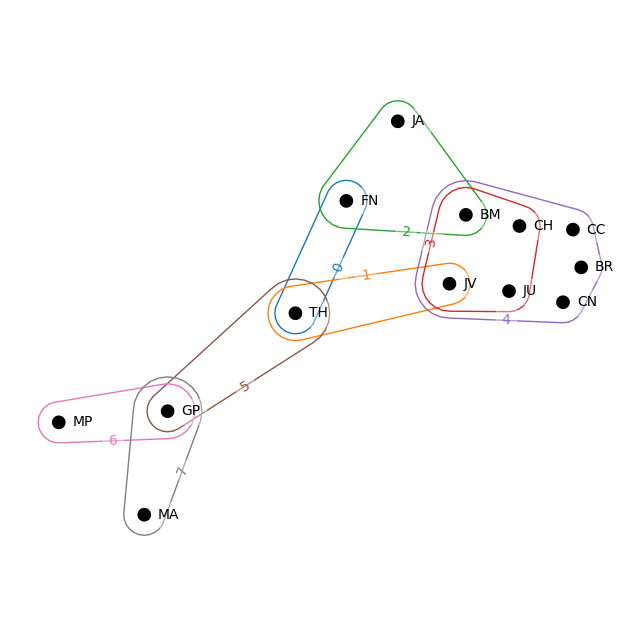

In [4]:
hnx.drawing.draw(H)

# Advanced Visualization Parameters
Properties like colors and thickness can be adjusted. This allows style parameters to be passed directly to the corresponding Matplotlib function. The mapping is as follows:
* `edges_kwargs` => `matplotlib.collections.PolyCollection`
* `nodes_kwargs` => `matplotlib.collections.PolyCollection`
* `edge_labels_kwargs` => `matplotlib.annotate`
* `node_labels_kwargs` => `matplotlib.annotate`

In [16]:
def draw_each(H, **kwargs):
    plt.figure(figsize=(18, 6))

    plt.subplot(131)
    plt.title('Euler Style')
    hnx.draw(H, **kwargs)
    
    plt.subplot(132)
    plt.title('Two-Column Style (new)')
    draw_bipartite.draw_bipartite_using_euler(H, **kwargs)
    
    plt.subplot(133)
    plt.title('Incidence/UpSet Style (new)')
    draw_incidence.draw_incidence_upset(
        H, edge_labels_on_axis=False,
        **kwargs
    )

    plt.show()

['CN', 'BR', 'CC', 'CH', 'JU', 'BM', 'JA', 'JV', 'FN', 'TH', 'GP', 'MP', 'MA'] [np.int64(4), np.int64(3), np.int64(2), np.int64(1), np.int64(0), np.int64(5), np.int64(6), np.int64(7)]
{np.int64(4): (0, 0), np.int64(3): (0, 3), np.int64(2): (0, 5), np.int64(1): (0, 7), np.int64(0): (0, 8), np.int64(5): (0, 9), np.int64(6): (0, 10), np.int64(7): (0, 11), 'CN': (6.5, 0), 'BR': (6.5, 1), 'CC': (6.5, 2), 'CH': (6.5, 3), 'JU': (6.5, 4), 'BM': (6.5, 5), 'JA': (6.5, 6), 'JV': (6.5, 7), 'FN': (6.5, 8), 'TH': (6.5, 9), 'GP': (6.5, 10), 'MP': (6.5, 11), 'MA': (6.5, 12)}


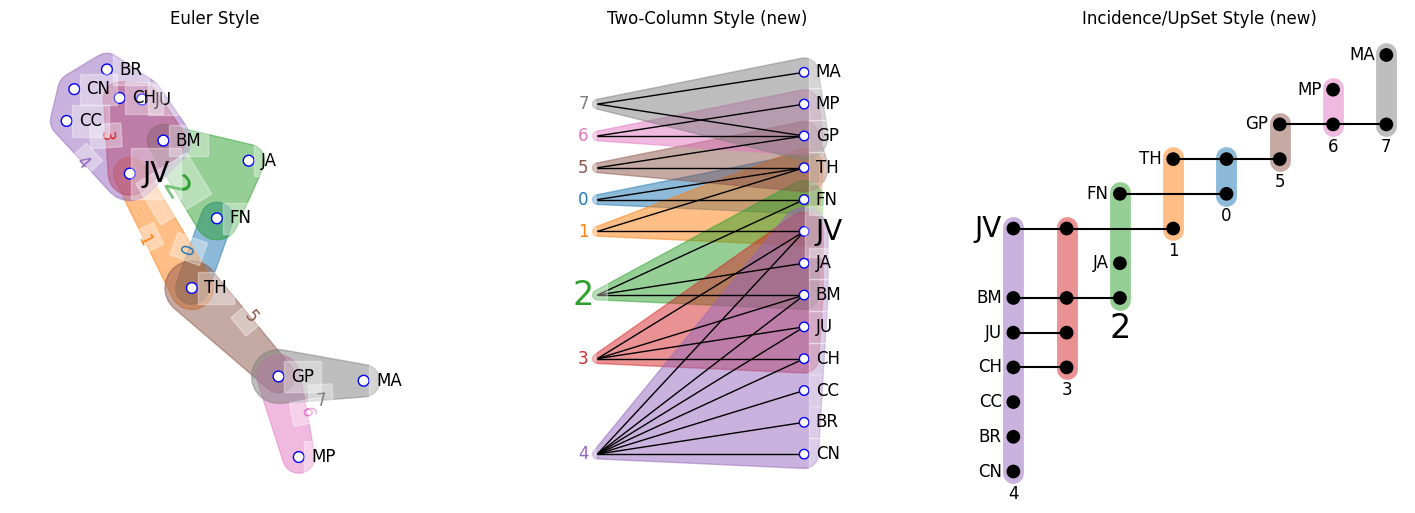

In [47]:
# fontsize doesn't work with functions
# arrays work on edge labels but not on node labels?
# edgecolors and facecolors for nodes don't work on the upset visualization

node_labels_kwargs={
    'fontsize': {v: 20 if v=='JV' else 12 for v in H},
    # 'fontsize': [20 if v=='JV' else 12 for v in H.nodes()]
}

edge_labels_kwargs={
    'fontsize': [24 if H.size(v) == 3 else 12 for v in H.edges()]
}

edge_color = lambda e: plt.cm.tab10(e)
lighter_edge_color = lambda e: edge_color(e) + np.array([0, 0, 0, -.5])

kwargs = {
    'edges_kwargs': {
        'edgecolors': edge_color,
        'facecolors': lighter_edge_color,
        'color': lighter_edge_color,
        
    },
    'nodes_kwargs': {
        'edgecolors': 'blue',
        'facecolors': 'white',
    },
    'node_labels_kwargs': node_labels_kwargs,
    'edge_labels_kwargs': edge_labels_kwargs
}

draw_each(H, **kwargs)

## Label options
For anything but trivially small hypergraphs, the number of items in a collapsed element can be large, causing the label to be very long. You can set `with_node_counts=True` to mitigate this. This will replace node labels with counts where there is more than one element at that node.

The collapsed nodes from above have been replaced with `x3` and `x2`, and the rest of the labels have disappeared.

Similarly, hyperedges can be collapsed and relabeled. We will use the dual to illustrate this.

['BR:3', 'CH:2', 'BM:1', 'JA:1', 'JV:1', 'FN:1', 'TH:1', 'GP:1', 'MA:1', 'MP:1'] [np.int64(4), np.int64(3), np.int64(2), np.int64(1), np.int64(0), np.int64(5), np.int64(7), np.int64(6)]
{np.int64(4): (0, 0), np.int64(3): (0, 1), np.int64(2): (0, 2), np.int64(1): (0, 4), np.int64(0): (0, 5), np.int64(5): (0, 6), np.int64(7): (0, 7), np.int64(6): (0, 8), 'BR:3': (5.0, 0), 'CH:2': (5.0, 1), 'BM:1': (5.0, 2), 'JA:1': (5.0, 3), 'JV:1': (5.0, 4), 'FN:1': (5.0, 5), 'TH:1': (5.0, 6), 'GP:1': (5.0, 7), 'MA:1': (5.0, 8), 'MP:1': (5.0, 9)}


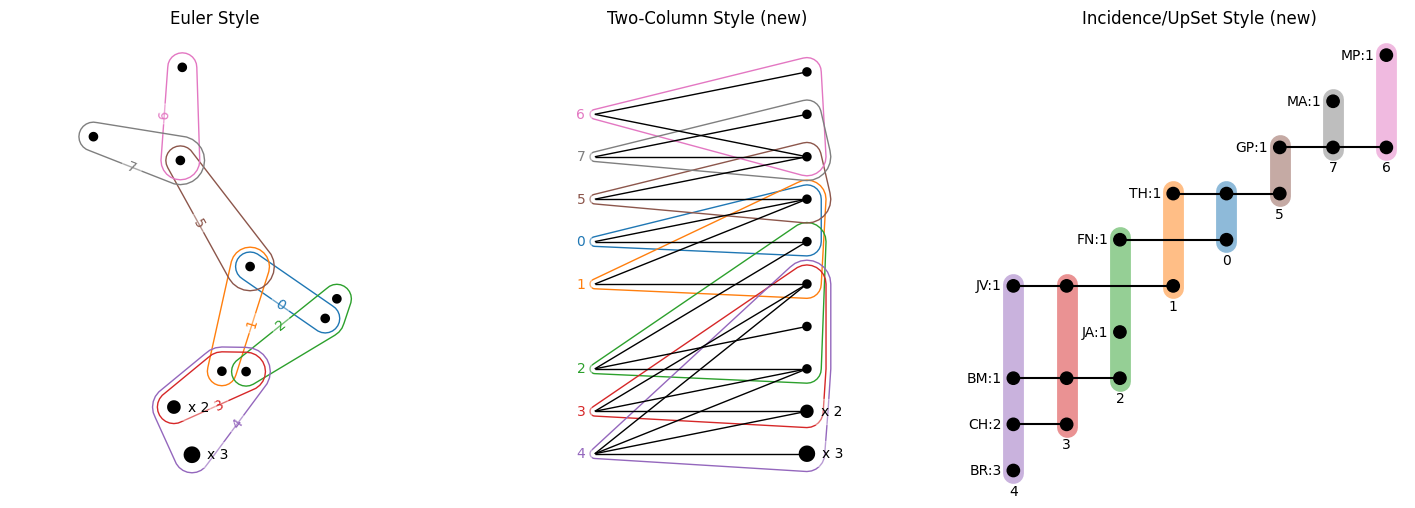

In [18]:
draw_each(H.collapse_nodes(use_counts=True), with_node_counts=True)

[4, 3, 2, 1, 0, 5, 7, 6] ['BR:3', 'CH:2', 'BM:1', 'JA:1', 'JV:1', 'FN:1', 'TH:1', 'GP:1', 'MA:1', 'MP:1']
{'BR:3': (0, 0), 'CH:2': (0, 1), 'BM:1': (0, 2), 'JA:1': (0, 3), 'JV:1': (0, 4), 'FN:1': (0, 5), 'TH:1': (0, 6), 'GP:1': (0, 7), 'MA:1': (0, 8), 'MP:1': (0, 9), 4: (5.0, 0), 3: (5.0, 1), 2: (5.0, 2), 1: (5.0, 4), 0: (5.0, 5), 5: (5.0, 6), 7: (5.0, 7), 6: (5.0, 8)}
{'BM:1': '', 'BR:3': 'x 3', 'CH:2': 'x 2', 'FN:1': '', 'GP:1': '', 'JA:1': '', 'JV:1': '', 'MA:1': '', 'MP:1': '', 'TH:1': ''}


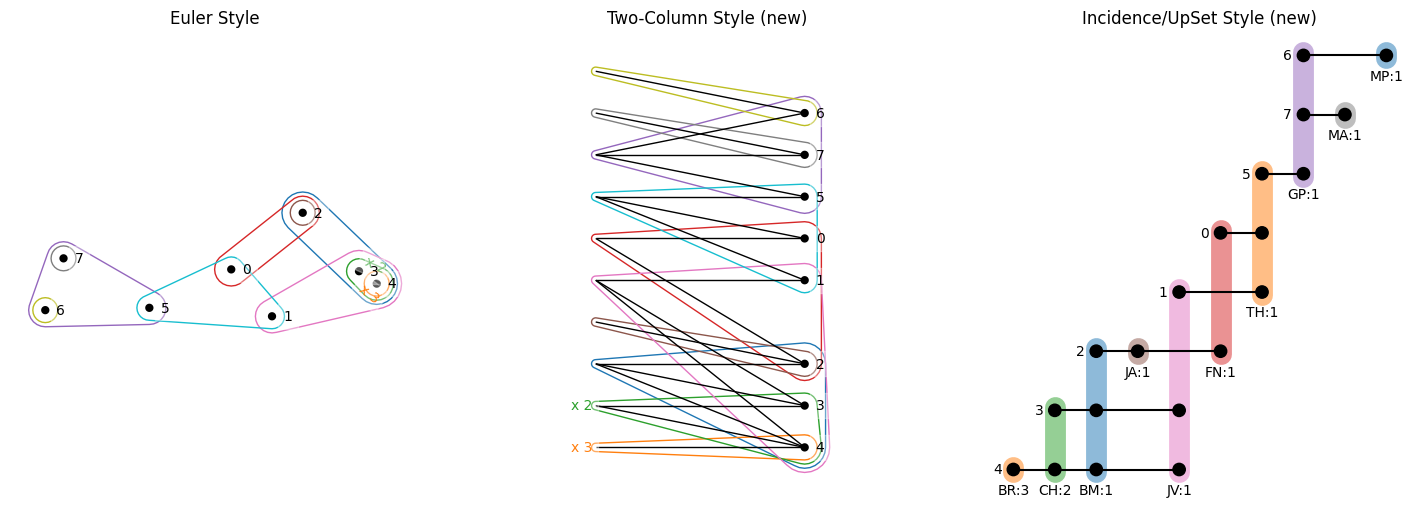

In [19]:
draw_each(H.dual().collapse_edges(use_counts=True), with_edge_counts=True)

## Disabling labels
If edge or node labels are a distraction, they can be turned off completely by passing in `with_edge_labels=False` or `with_node_labels=False`

['CN', 'BR', 'CC', 'CH', 'JU', 'BM', 'JA', 'JV', 'FN', 'TH', 'GP', 'MP', 'MA'] [np.int64(4), np.int64(3), np.int64(2), np.int64(1), np.int64(0), np.int64(5), np.int64(6), np.int64(7)]
{np.int64(4): (0, 0), np.int64(3): (0, 3), np.int64(2): (0, 5), np.int64(1): (0, 7), np.int64(0): (0, 8), np.int64(5): (0, 9), np.int64(6): (0, 10), np.int64(7): (0, 11), 'CN': (6.5, 0), 'BR': (6.5, 1), 'CC': (6.5, 2), 'CH': (6.5, 3), 'JU': (6.5, 4), 'BM': (6.5, 5), 'JA': (6.5, 6), 'JV': (6.5, 7), 'FN': (6.5, 8), 'TH': (6.5, 9), 'GP': (6.5, 10), 'MP': (6.5, 11), 'MA': (6.5, 12)}


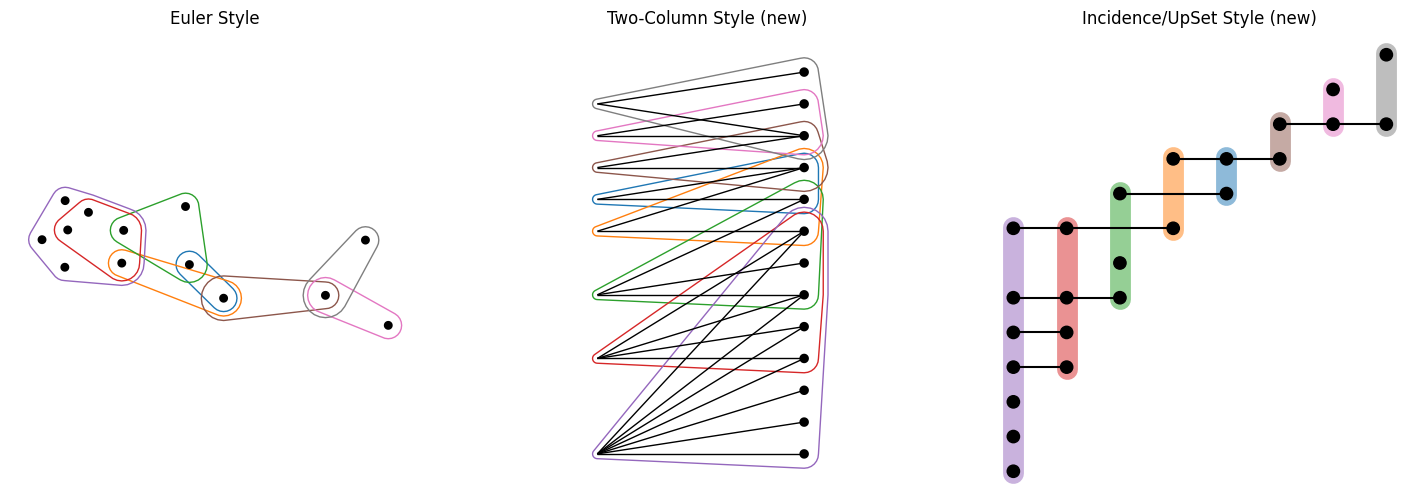

In [20]:
draw_each(H, with_edge_labels=False, with_node_labels=False)

## Colors
Pass a **single string** to set a specific color for all nodes/edges. Pass a **function**, **array**, or **dictionary** using matplotlib colors to configure individual colors of nodes/edges. 

['CN', 'BR', 'CC', 'CH', 'JU', 'BM', 'JA', 'JV', 'FN', 'TH', 'GP', 'MP', 'MA'] [np.int64(4), np.int64(3), np.int64(2), np.int64(1), np.int64(0), np.int64(5), np.int64(6), np.int64(7)]
{np.int64(4): (0, 0), np.int64(3): (0, 3), np.int64(2): (0, 5), np.int64(1): (0, 7), np.int64(0): (0, 8), np.int64(5): (0, 9), np.int64(6): (0, 10), np.int64(7): (0, 11), 'CN': (6.5, 0), 'BR': (6.5, 1), 'CC': (6.5, 2), 'CH': (6.5, 3), 'JU': (6.5, 4), 'BM': (6.5, 5), 'JA': (6.5, 6), 'JV': (6.5, 7), 'FN': (6.5, 8), 'TH': (6.5, 9), 'GP': (6.5, 10), 'MP': (6.5, 11), 'MA': (6.5, 12)}


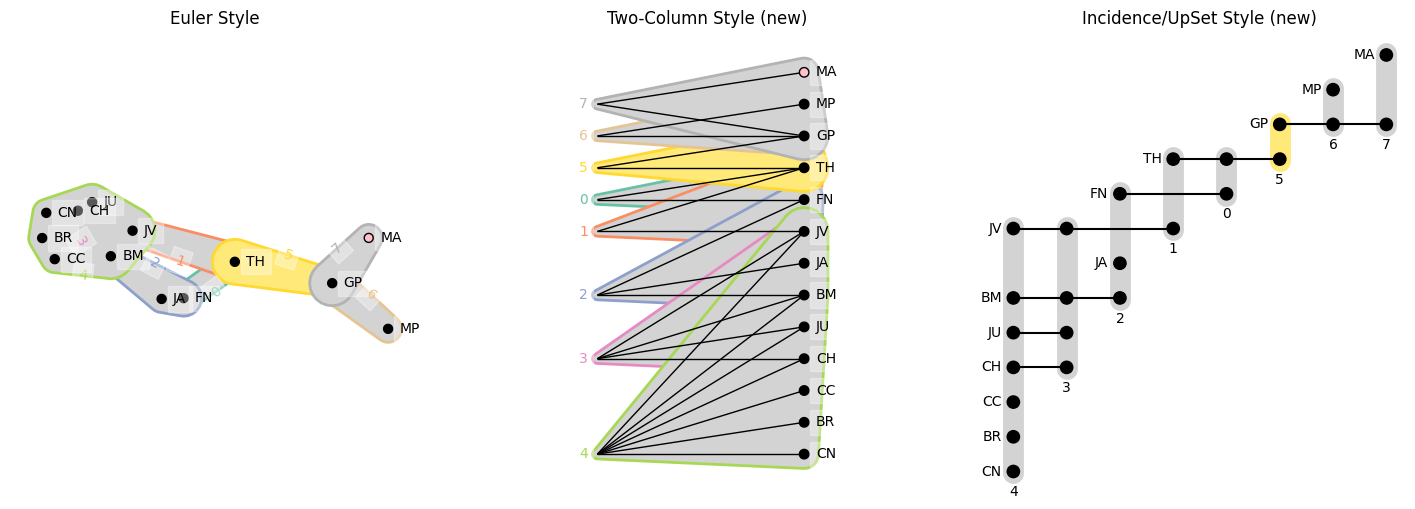

In [44]:
draw_each(
    H,
    nodes_kwargs={
        'facecolors': lambda n: 'pink' if n=='MA' else 'black',
        'edgecolors': 'black'
    },
    edges_kwargs={
        'facecolors': ['#ffe979' if e==5 else '#d3d3d3' for e in H.edges()],
        'edgecolors': {e: plt.cm.Set2(e) for e in H.edges()},
        'linewidths': 2
    }
)

### Node color

We can configure node colors by setting facecolors and edgecolors in `node_kwargs` using a single string, array, dict, or a function. 

['CN', 'BR', 'CC', 'CH', 'JU', 'BM', 'JA', 'JV', 'FN', 'TH', 'GP', 'MP', 'MA'] [np.int64(4), np.int64(3), np.int64(2), np.int64(1), np.int64(0), np.int64(5), np.int64(6), np.int64(7)]
{np.int64(4): (0, 0), np.int64(3): (0, 3), np.int64(2): (0, 5), np.int64(1): (0, 7), np.int64(0): (0, 8), np.int64(5): (0, 9), np.int64(6): (0, 10), np.int64(7): (0, 11), 'CN': (6.5, 0), 'BR': (6.5, 1), 'CC': (6.5, 2), 'CH': (6.5, 3), 'JU': (6.5, 4), 'BM': (6.5, 5), 'JA': (6.5, 6), 'JV': (6.5, 7), 'FN': (6.5, 8), 'TH': (6.5, 9), 'GP': (6.5, 10), 'MP': (6.5, 11), 'MA': (6.5, 12)}


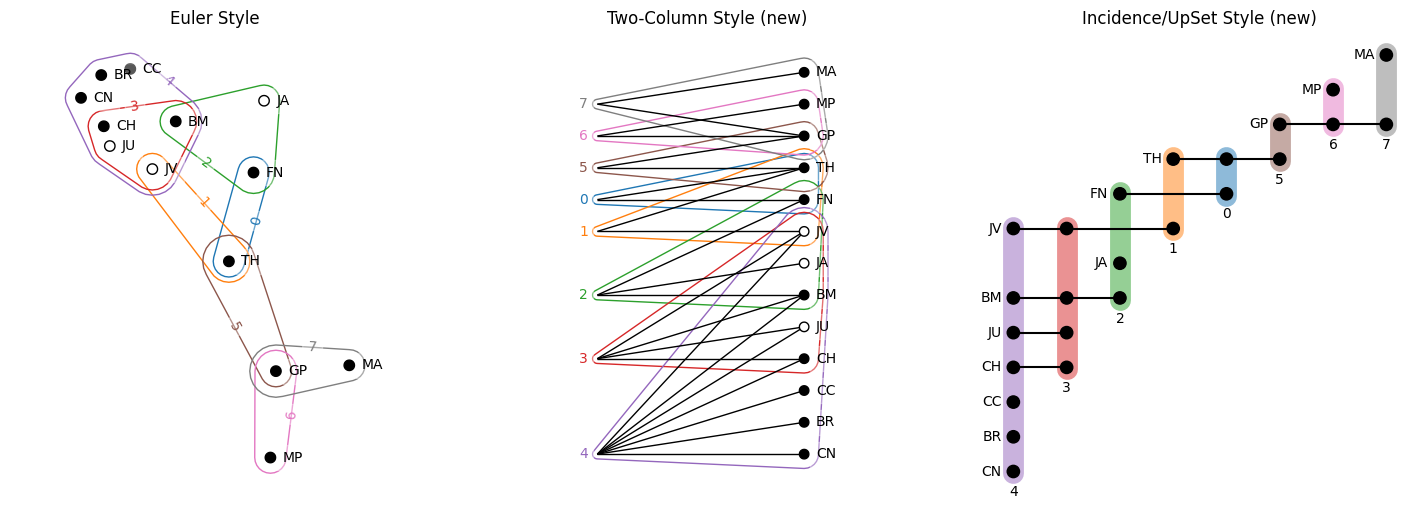

In [29]:
draw_each(
    H,
    nodes_kwargs={
        'facecolors': lambda n: 'white' if 'J' in n else 'black',
        'edgecolors': 'black'
    }
)

['CN', 'BR', 'CC', 'CH', 'JU', 'BM', 'JA', 'JV', 'FN', 'TH', 'GP', 'MP', 'MA'] [np.int64(4), np.int64(3), np.int64(2), np.int64(1), np.int64(0), np.int64(5), np.int64(6), np.int64(7)]
{np.int64(4): (0, 0), np.int64(3): (0, 3), np.int64(2): (0, 5), np.int64(1): (0, 7), np.int64(0): (0, 8), np.int64(5): (0, 9), np.int64(6): (0, 10), np.int64(7): (0, 11), 'CN': (6.5, 0), 'BR': (6.5, 1), 'CC': (6.5, 2), 'CH': (6.5, 3), 'JU': (6.5, 4), 'BM': (6.5, 5), 'JA': (6.5, 6), 'JV': (6.5, 7), 'FN': (6.5, 8), 'TH': (6.5, 9), 'GP': (6.5, 10), 'MP': (6.5, 11), 'MA': (6.5, 12)}


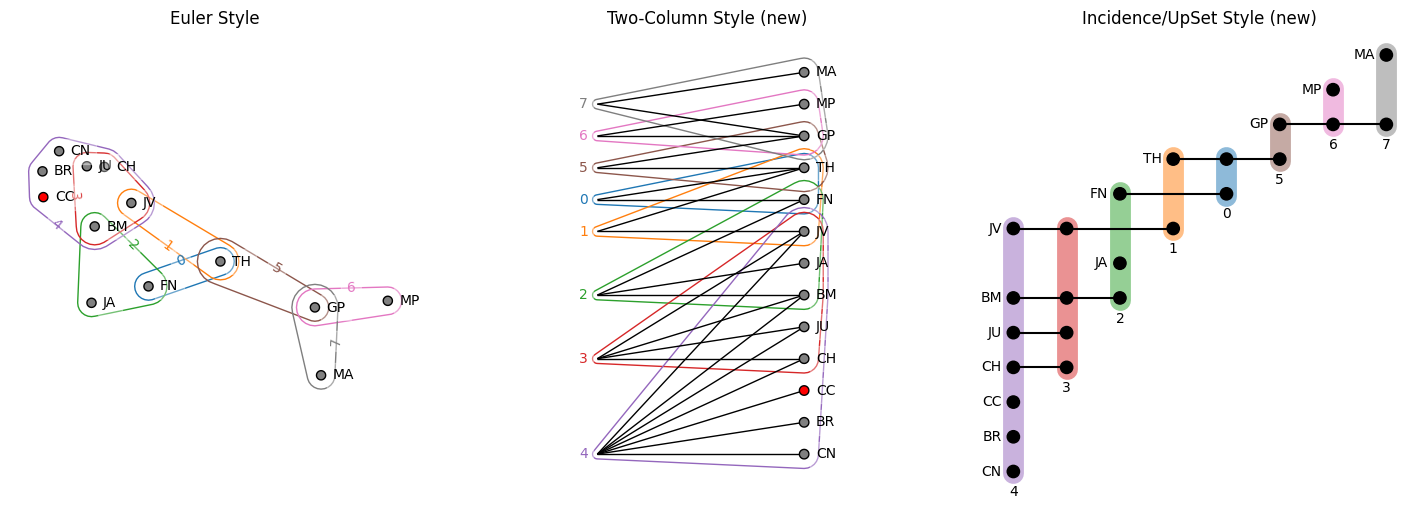

In [30]:
draw_each(
    H,
    nodes_kwargs={
        'facecolors': {v: 'red' if v == 'CC' else 'gray' for v in H.nodes()},
        'edgecolors': 'black'
    }
)

In this example, we color the collapsed nodes red that are larger than 1 node:

['BR:3', 'CH:2', 'BM:1', 'JA:1', 'JV:1', 'FN:1', 'TH:1', 'GP:1', 'MA:1', 'MP:1'] [np.int64(4), np.int64(3), np.int64(2), np.int64(1), np.int64(0), np.int64(5), np.int64(7), np.int64(6)]
{np.int64(4): (0, 0), np.int64(3): (0, 1), np.int64(2): (0, 2), np.int64(1): (0, 4), np.int64(0): (0, 5), np.int64(5): (0, 6), np.int64(7): (0, 7), np.int64(6): (0, 8), 'BR:3': (5.0, 0), 'CH:2': (5.0, 1), 'BM:1': (5.0, 2), 'JA:1': (5.0, 3), 'JV:1': (5.0, 4), 'FN:1': (5.0, 5), 'TH:1': (5.0, 6), 'GP:1': (5.0, 7), 'MA:1': (5.0, 8), 'MP:1': (5.0, 9)}


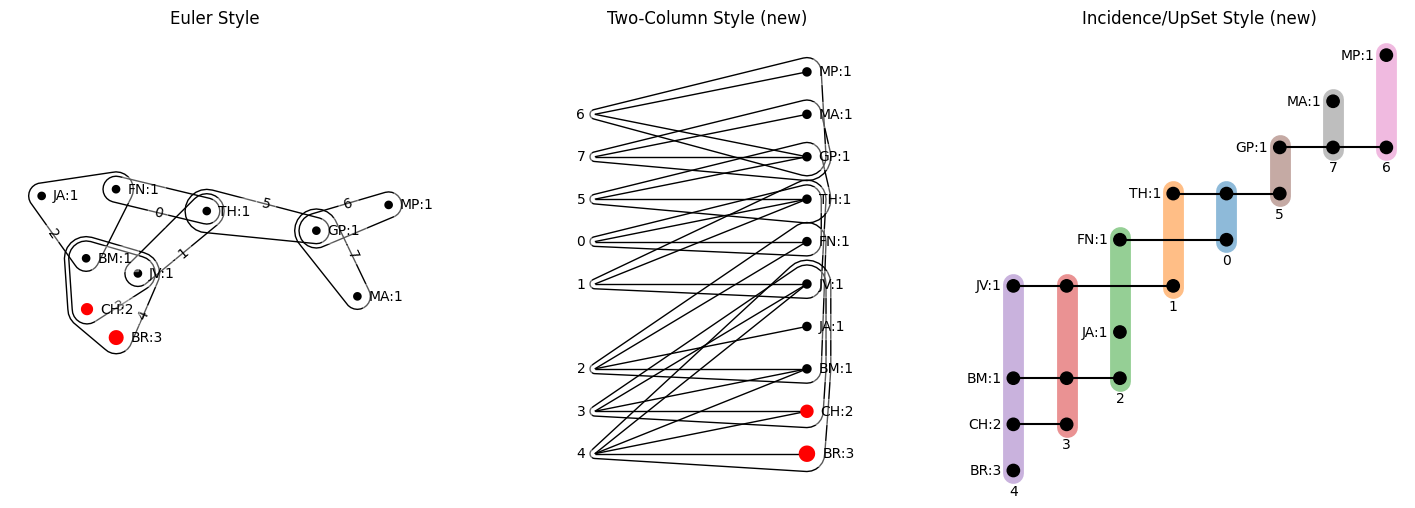

In [31]:
# facecolors not working on upset
from hypernetx.drawing.util import get_collapsed_size
H_collapsed = H.collapse_nodes(use_counts=True)

colors = [
    'red' if get_collapsed_size(v) > 1 else 'black'
    for v in H_collapsed
]

draw_each(
    H_collapsed,
    edges_kwargs={
     'edgecolors': 'black'
    },
    nodes_kwargs={
     'facecolors': colors
    }
)

### Edge color

By default, we cycle through one of 10 unique colors for edges. This can be overridden using the `edges_kwargs` parameter. Here we adjust the linewidth, edge color, and face color. 

In this example, we are using collapsed nodes using `collapse_nodes`.

['BR:3', 'CH:2', 'BM:1', 'JA:1', 'JV:1', 'FN:1', 'TH:1', 'GP:1', 'MA:1', 'MP:1'] [np.int64(4), np.int64(3), np.int64(2), np.int64(1), np.int64(0), np.int64(5), np.int64(7), np.int64(6)]
{np.int64(4): (0, 0), np.int64(3): (0, 1), np.int64(2): (0, 2), np.int64(1): (0, 4), np.int64(0): (0, 5), np.int64(5): (0, 6), np.int64(7): (0, 7), np.int64(6): (0, 8), 'BR:3': (5.0, 0), 'CH:2': (5.0, 1), 'BM:1': (5.0, 2), 'JA:1': (5.0, 3), 'JV:1': (5.0, 4), 'FN:1': (5.0, 5), 'TH:1': (5.0, 6), 'GP:1': (5.0, 7), 'MA:1': (5.0, 8), 'MP:1': (5.0, 9)}


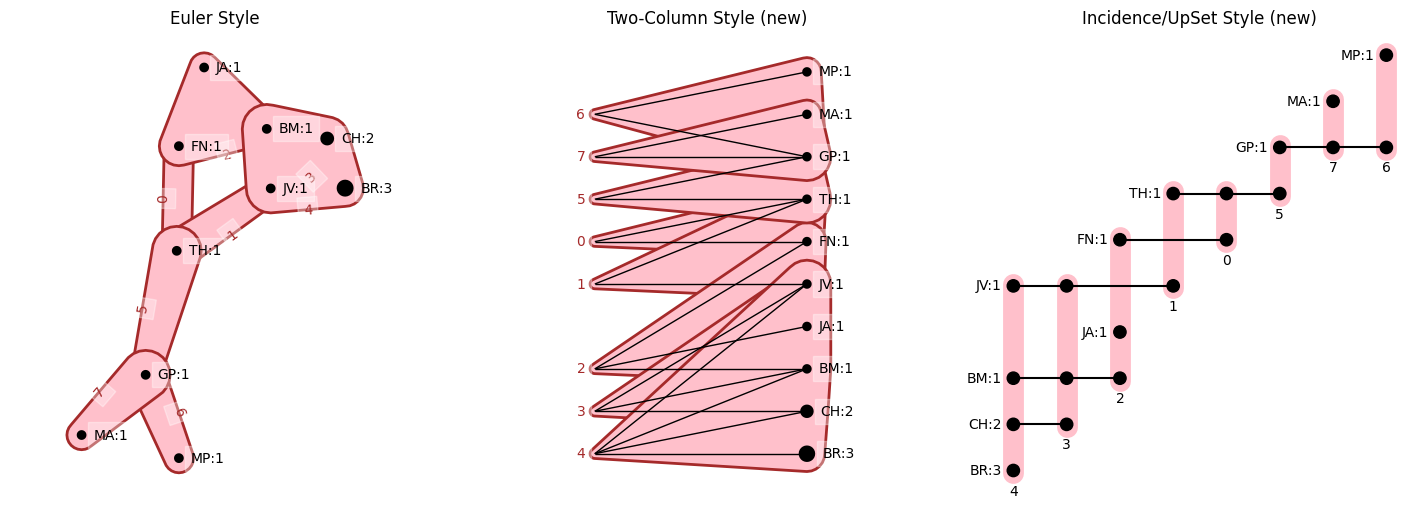

In [32]:
# edgecolors - not working on upset
H_collapsed = H.collapse_nodes(use_counts=True)

draw_each(H_collapsed,
    edges_kwargs={
        'linewidths': 2,
        'edgecolors': 'brown',
        'facecolors': 'pink'
    }
)

['CN', 'BR', 'CC', 'CH', 'JU', 'BM', 'JA', 'JV', 'FN', 'TH', 'GP', 'MP', 'MA'] [np.int64(4), np.int64(3), np.int64(2), np.int64(1), np.int64(0), np.int64(5), np.int64(6), np.int64(7)]
{np.int64(4): (0, 0), np.int64(3): (0, 3), np.int64(2): (0, 5), np.int64(1): (0, 7), np.int64(0): (0, 8), np.int64(5): (0, 9), np.int64(6): (0, 10), np.int64(7): (0, 11), 'CN': (6.5, 0), 'BR': (6.5, 1), 'CC': (6.5, 2), 'CH': (6.5, 3), 'JU': (6.5, 4), 'BM': (6.5, 5), 'JA': (6.5, 6), 'JV': (6.5, 7), 'FN': (6.5, 8), 'TH': (6.5, 9), 'GP': (6.5, 10), 'MP': (6.5, 11), 'MA': (6.5, 12)}


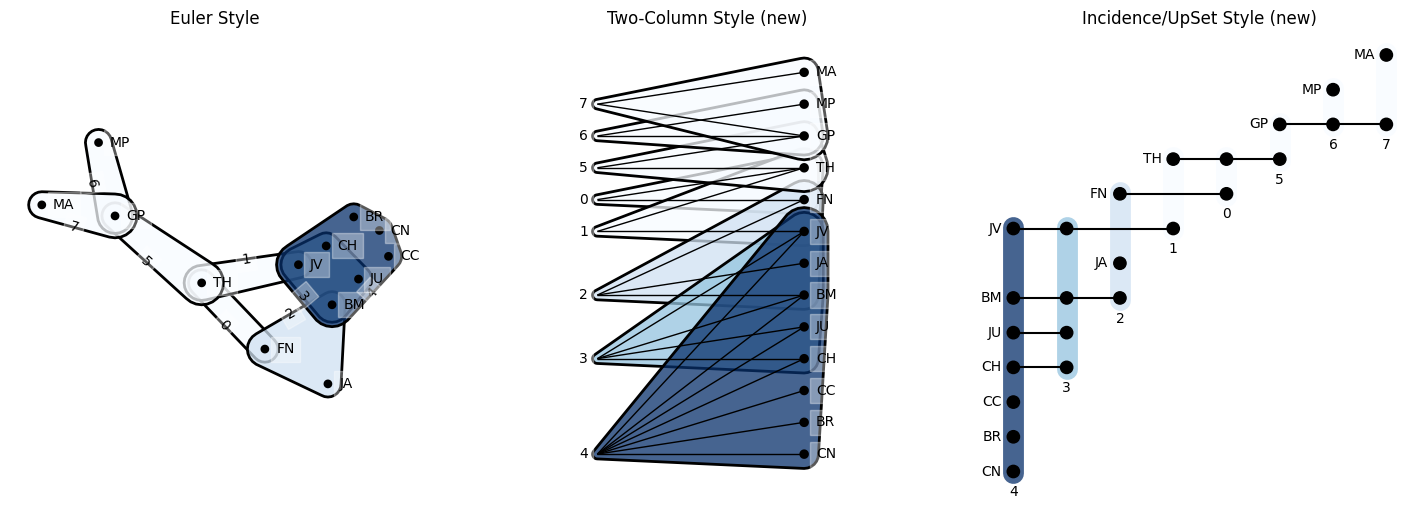

In [35]:
cmap = plt.cm.Blues
alpha = .75

sizes = np.array([H.size(e) for e in H.edges()])
norm = plt.Normalize(sizes.min(), sizes.max())

draw_each(H,
    edges_kwargs={
        'facecolors': cmap(norm(sizes))*(1, 1, 1, alpha),
        'edgecolors': 'black',
        'linewidths': 2
    }
)

In [39]:
H.incidence_dict

{0: ['FN', 'TH'],
 1: ['TH', 'JV'],
 2: ['BM', 'FN', 'JA'],
 3: ['JV', 'JU', 'CH', 'BM'],
 4: ['JU', 'CH', 'BR', 'CN', 'CC', 'JV', 'BM'],
 5: ['TH', 'GP'],
 6: ['GP', 'MP'],
 7: ['MA', 'GP']}

['CN', 'BR', 'CC', 'CH', 'JU', 'BM', 'JA', 'JV', 'FN', 'TH', 'GP', 'MP', 'MA'] [np.int64(4), np.int64(3), np.int64(2), np.int64(1), np.int64(0), np.int64(5), np.int64(6), np.int64(7)]
{np.int64(4): (0, 0), np.int64(3): (0, 3), np.int64(2): (0, 5), np.int64(1): (0, 7), np.int64(0): (0, 8), np.int64(5): (0, 9), np.int64(6): (0, 10), np.int64(7): (0, 11), 'CN': (6.5, 0), 'BR': (6.5, 1), 'CC': (6.5, 2), 'CH': (6.5, 3), 'JU': (6.5, 4), 'BM': (6.5, 5), 'JA': (6.5, 6), 'JV': (6.5, 7), 'FN': (6.5, 8), 'TH': (6.5, 9), 'GP': (6.5, 10), 'MP': (6.5, 11), 'MA': (6.5, 12)}


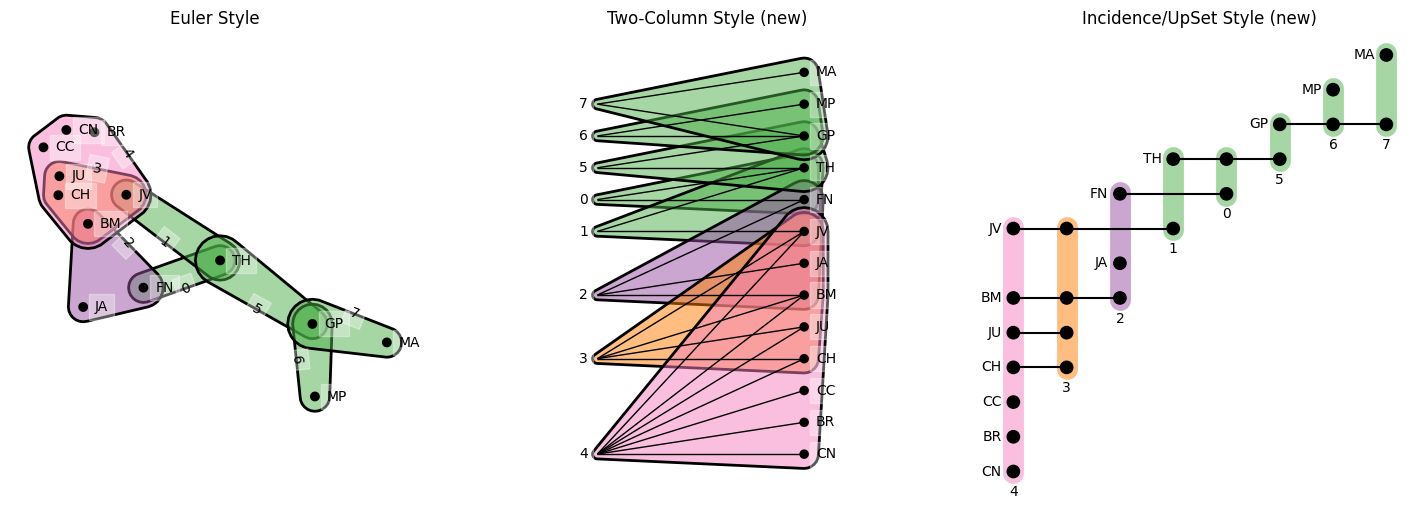

In [48]:
edge_color_dict = {e: plt.cm.Set1(H.size(e)) + np.array([0, 0, 0, -.5]) for e in H.edges()}

draw_each(H,
    edges_kwargs={
        'linewidths': 2,
        'edgecolors': 'black',
        'facecolors': edge_color_dict
    }
)

['BR:3', 'CH:2', 'BM:1', 'JA:1', 'JV:1', 'FN:1', 'TH:1', 'GP:1', 'MA:1', 'MP:1'] [np.int64(4), np.int64(3), np.int64(2), np.int64(1), np.int64(0), np.int64(5), np.int64(7), np.int64(6)]
{np.int64(4): (0, 0), np.int64(3): (0, 1), np.int64(2): (0, 2), np.int64(1): (0, 4), np.int64(0): (0, 5), np.int64(5): (0, 6), np.int64(7): (0, 7), np.int64(6): (0, 8), 'BR:3': (5.0, 0), 'CH:2': (5.0, 1), 'BM:1': (5.0, 2), 'JA:1': (5.0, 3), 'JV:1': (5.0, 4), 'FN:1': (5.0, 5), 'TH:1': (5.0, 6), 'GP:1': (5.0, 7), 'MA:1': (5.0, 8), 'MP:1': (5.0, 9)}


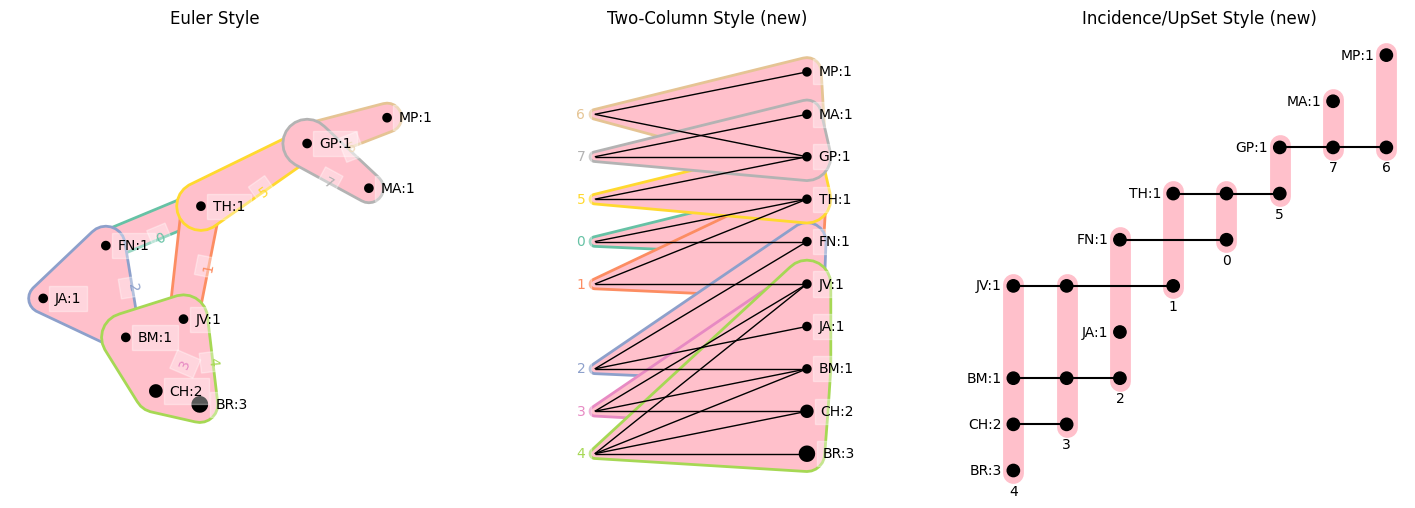

In [49]:
# edgecolors not working on upset
edge_color_func = lambda e: plt.cm.Set2(e)

draw_each(H_collapsed,
    edges_kwargs={
        'linewidths': 2,
        'edgecolors': edge_color_func,
        'facecolors': 'pink'
    }
)

## Font
Fontsize and other attributes can be set with the `node_labels_kwargs` and `edge_labels_kwargs` parameters. Here we set the font size at 24 to make the nodes appear large for illustrative purposes.

['BR', 'CH', 'BM', 'JA', 'JV', 'FN', 'TH', 'GP', 'MA', 'MP'] [np.int64(4), np.int64(3), np.int64(2), np.int64(1), np.int64(0), np.int64(5), np.int64(7), np.int64(6)]
{np.int64(4): (0, 0), np.int64(3): (0, 1), np.int64(2): (0, 2), np.int64(1): (0, 4), np.int64(0): (0, 5), np.int64(5): (0, 6), np.int64(7): (0, 7), np.int64(6): (0, 8), 'BR': (5.0, 0), 'CH': (5.0, 1), 'BM': (5.0, 2), 'JA': (5.0, 3), 'JV': (5.0, 4), 'FN': (5.0, 5), 'TH': (5.0, 6), 'GP': (5.0, 7), 'MA': (5.0, 8), 'MP': (5.0, 9)}


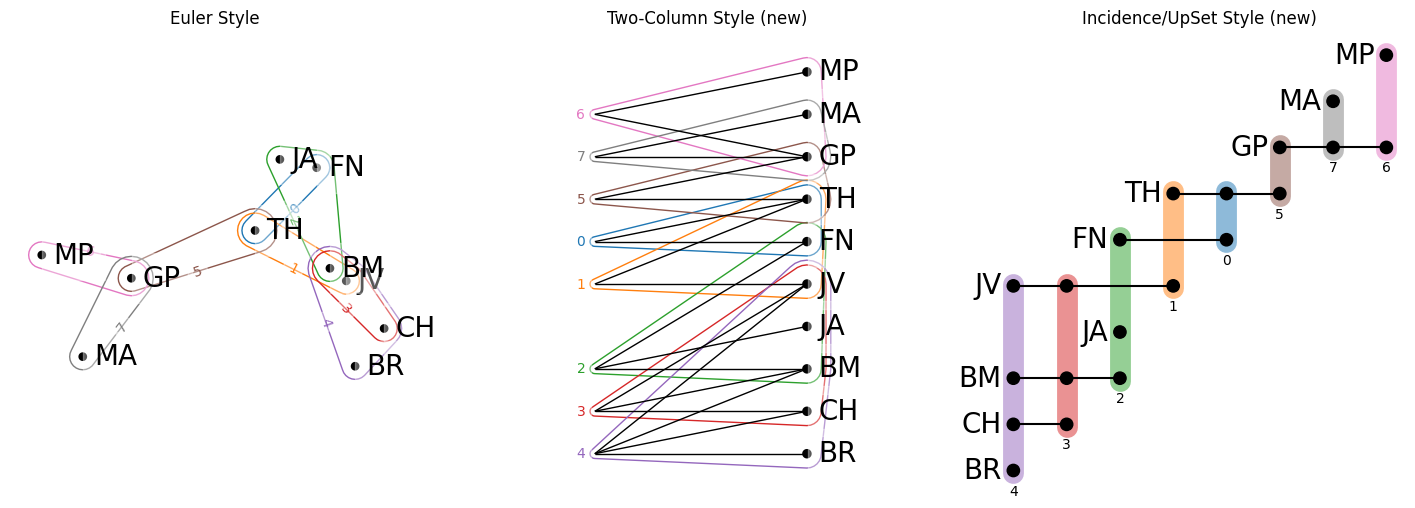

In [50]:
draw_each(H.collapse_nodes(),
    node_labels_kwargs={
        'fontsize': 20
    }
)

Font attributes can be individually set by passing in an array of font values or a dictionary mapping nodes to values

['CN', 'BR', 'CC', 'CH', 'JU', 'BM', 'JA', 'JV', 'FN', 'TH', 'GP', 'MP', 'MA'] [np.int64(4), np.int64(3), np.int64(2), np.int64(1), np.int64(0), np.int64(5), np.int64(6), np.int64(7)]
{np.int64(4): (0, 0), np.int64(3): (0, 3), np.int64(2): (0, 5), np.int64(1): (0, 7), np.int64(0): (0, 8), np.int64(5): (0, 9), np.int64(6): (0, 10), np.int64(7): (0, 11), 'CN': (6.5, 0), 'BR': (6.5, 1), 'CC': (6.5, 2), 'CH': (6.5, 3), 'JU': (6.5, 4), 'BM': (6.5, 5), 'JA': (6.5, 6), 'JV': (6.5, 7), 'FN': (6.5, 8), 'TH': (6.5, 9), 'GP': (6.5, 10), 'MP': (6.5, 11), 'MA': (6.5, 12)}


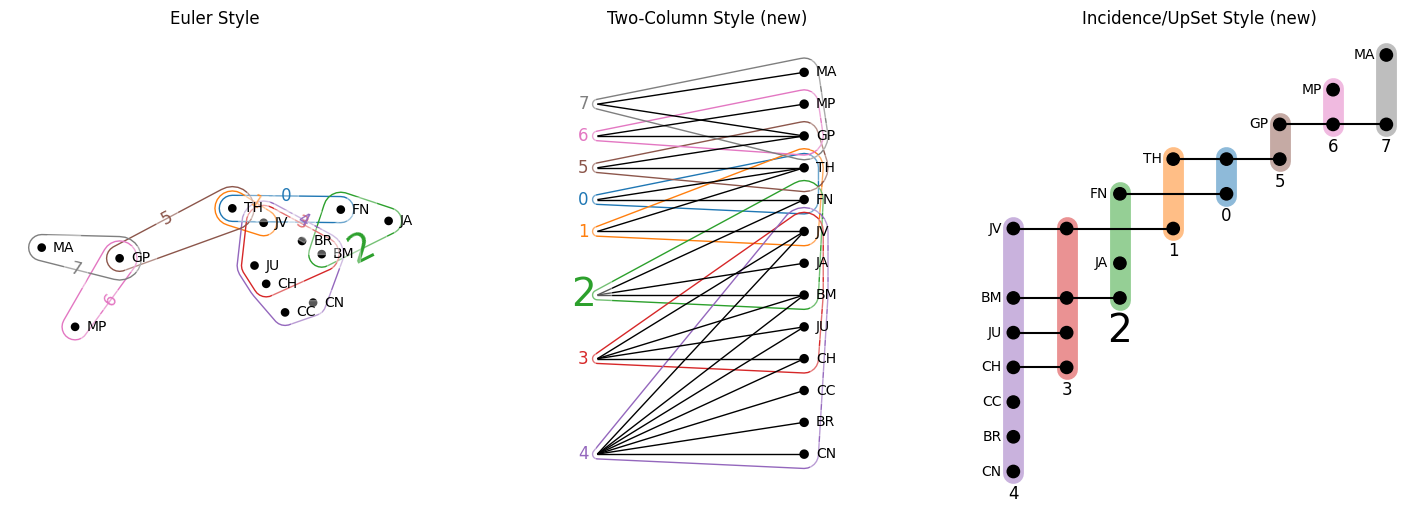

In [51]:
edge_labels_kwargs={
    'fontsize': [28 if v==2 else 12 for v in H.edges()]
}

draw_each(H, 
    edge_labels_kwargs={'fontsize': [28 if v==2 else 12 for v in H.edges()]}
)

['CN', 'BR', 'CC', 'CH', 'JU', 'BM', 'JA', 'JV', 'FN', 'TH', 'GP', 'MP', 'MA'] [np.int64(4), np.int64(3), np.int64(2), np.int64(1), np.int64(0), np.int64(5), np.int64(6), np.int64(7)]
{np.int64(4): (0, 0), np.int64(3): (0, 3), np.int64(2): (0, 5), np.int64(1): (0, 7), np.int64(0): (0, 8), np.int64(5): (0, 9), np.int64(6): (0, 10), np.int64(7): (0, 11), 'CN': (6.5, 0), 'BR': (6.5, 1), 'CC': (6.5, 2), 'CH': (6.5, 3), 'JU': (6.5, 4), 'BM': (6.5, 5), 'JA': (6.5, 6), 'JV': (6.5, 7), 'FN': (6.5, 8), 'TH': (6.5, 9), 'GP': (6.5, 10), 'MP': (6.5, 11), 'MA': (6.5, 12)}


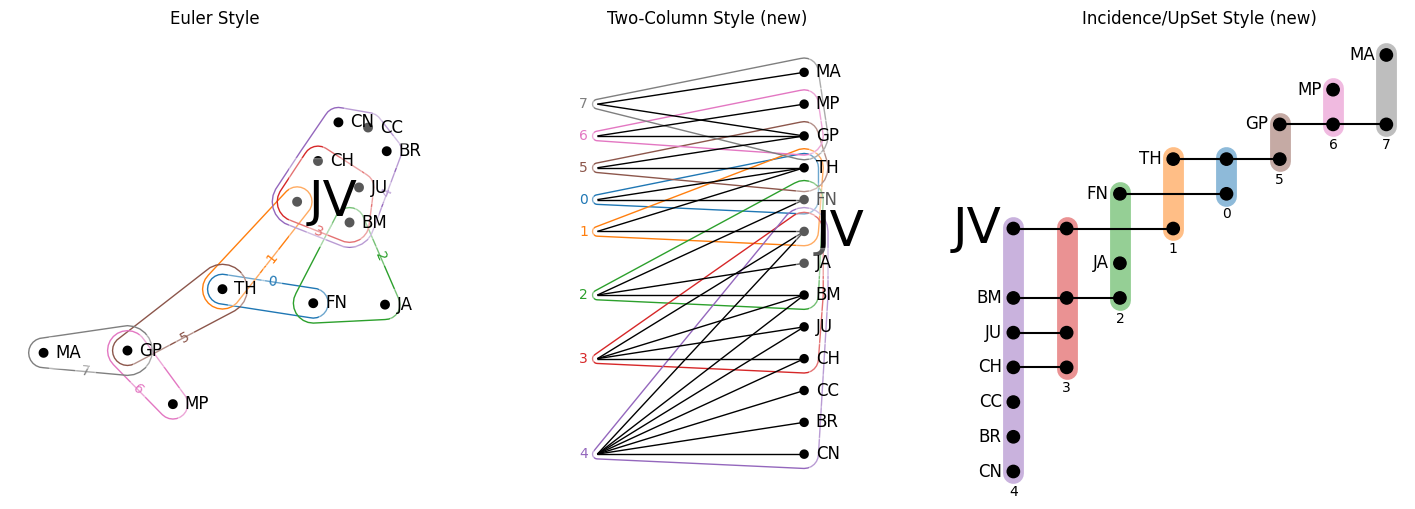

In [52]:
draw_each(H,
    node_labels_kwargs={
        'fontsize': {
            v: 36 if v == 'JV' else 12 for v in H
        }
    }
)